In [1]:
from bertopic import BERTopic
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import numpy as np
from umap import UMAP
from hdbscan import HDBSCAN


c:\Users\javie\anaconda3\envs\tfm\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data=pd.read_csv("data/data_sentiment_analisis.csv")

In [15]:
'''
**************************************************
**************BERTopic****************************
**************************************************
'''
# Ajustar UMAP para controlar la granularidad de los tópicos
umap_model = UMAP(n_neighbors=10, n_components=10, min_dist=0.0)

# Ajustar HDBSCAN para controlar el número de tópicos
hdbscan_model = HDBSCAN(min_cluster_size=100, min_samples=5, metric='euclidean', cluster_selection_method='eom')

# Crear el modelo BERTopic con los parámetros ajustados
topic_model = BERTopic(umap_model=umap_model, hdbscan_model=hdbscan_model, language="English")

# Ajustar el modelo a los datos
topics, _ = topic_model.fit_transform(data['review_preprocesada'])


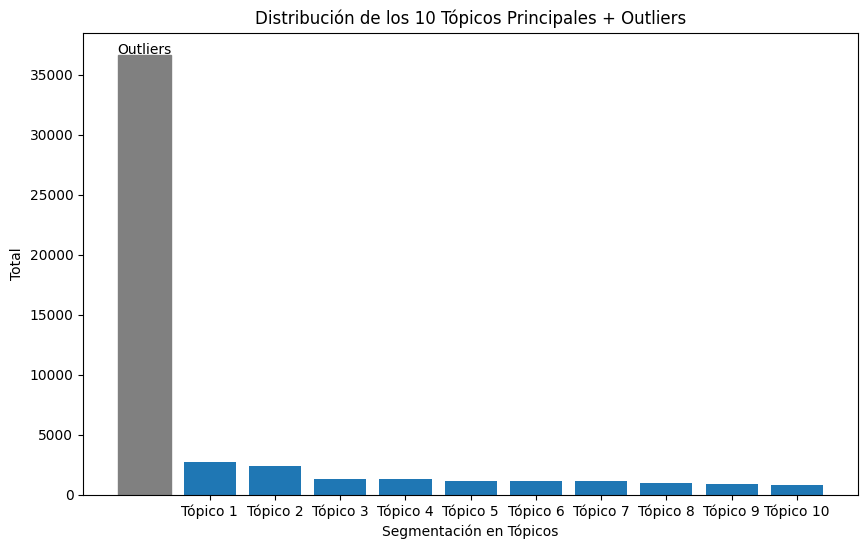

In [41]:
# Obtener la distribución de tópicos
topic_freq = topic_model.get_topic_info().head(11)

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
bars =plt.bar(topic_freq['Topic'], topic_freq['Count'])
bars[0].set_color('grey') 
plt.text(bars[0].get_x() + bars[1].get_width() / 2, 
         bars[0].get_height() + 50,   
         'Outliers',        
         ha='center',                  
         fontsize=10,                  
         color='black') 
plt.xticks(ticks=range(10), labels=['Tópico 1','Tópico 2' ,'Tópico 3','Tópico 4','Tópico 5','Tópico 6','Tópico 7','Tópico 8','Tópico 9','Tópico 10'])               
plt.xlabel('Segmentación en Tópicos')
plt.ylabel('Total')
plt.title('Distribución de los 10 Tópicos Principales + Outliers')
plt.savefig('image_topics/distribucion_topics_bertopic.png')
plt.show()

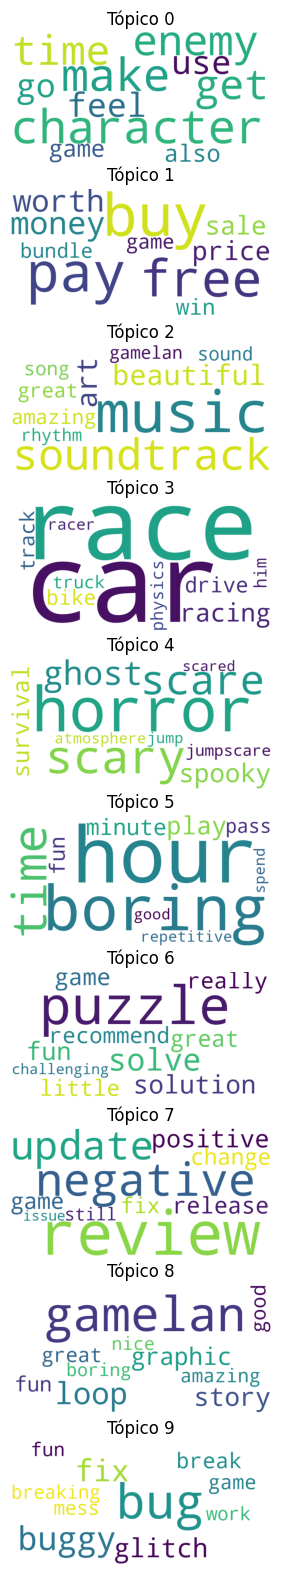

In [24]:

fig,axs = plt.subplots(10,figsize = (6,20))

for topic in range(10):  # Para los 10 primeros tópicos
    words = dict(topic_model.get_topic(topic))
    
    # Crear la nube de palabras
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(words)
    
    axs[topic].set_title(f'Tópico {topic}')
    axs[topic].imshow(wordcloud)
    axs[topic].axis('off')
    
plt.savefig('image_topics/wc_topics_bertopic.png')
plt.show()

In [43]:
fig1= topic_model.visualize_topics(top_n_topics=10)
fig2= topic_model.visualize_barchart(top_n_topics=10)
fig1.write_html("C:/Users/javie/OneDrive/TFM/TFM/image_topics/fig1_comentarios_test.html")
fig2.write_html("C:/Users/javie/OneDrive/TFM/TFM/image_topics/fig2_comentarios_test.html")